In [1]:
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

image (300, 400, 3)
bordes (300, 400)


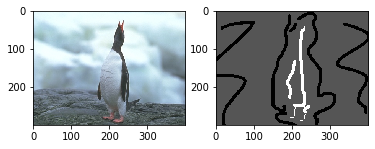

In [2]:
image = np.array(Image.open("imagenes/images/106024.bmp"))
bordes = np.array(Image.open("imagenes/bordes_mr/106024.bmp"))
print('image',image.shape)
print('bordes',bordes.shape)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(bordes,cmap='gray')
plt.show()

In [3]:
# Vectorizar las imagenes
nrows,ncols,nch = image.shape
Ximage = np.reshape(image,(nrows*ncols,3))
Xbordes = np.reshape(bordes,(nrows*ncols))
print('Ximage',Ximage.shape)
print(Ximage)
print('Xbordes',Xbordes.shape)
print(Xbordes)

Ximage (120000, 3)
[[230 249 253]
 [231 250 254]
 [231 250 254]
 ...
 [ 70  80  79]
 [ 70  81  77]
 [ 79  90  86]]
Xbordes (120000,)
[128 128 128 ... 128 128 128]


In [4]:
# Separar los pixeles del objeto y del fondo
print( np.unique(Xbordes) )

Xobj = Ximage[Xbordes==255]
Xbck = Ximage[Xbordes==64]
print('Xobj',Xobj.shape)
print('Xbck',Xbck.shape)

[ 64 128 255]
Xobj (3165, 3)
Xbck (13562, 3)


[[0.32156863 0.28235294 0.24313725]
 [0.32156863 0.28627451 0.25882353]
 [0.30196078 0.25882353 0.23529412]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


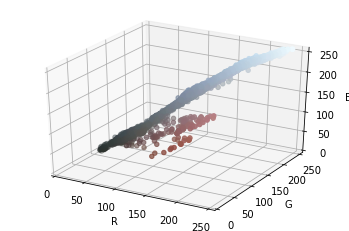

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


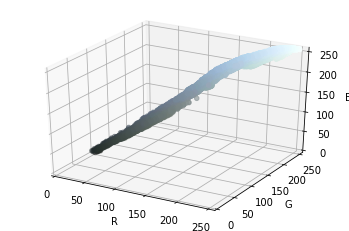

In [5]:
from mpl_toolkits.mplot3d import Axes3D

print(Xobj[:3,:]/255)

fig = plt.figure()
plt.title('Object')
ax = fig.gca(projection='3d')
R = Xobj[:,0]
G = Xobj[:,1]
B = Xobj[:,2]
ax.scatter(R, G, B, c=Xobj/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

fig = plt.figure()
plt.title('Background')
ax = fig.gca(projection='3d')
R = Xbck[:,0]
G = Xbck[:,1]
B = Xbck[:,2]
ax.scatter(R, G, B, c=Xbck/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()


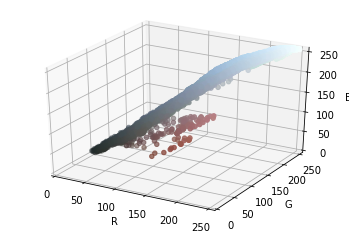

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')

R = Xobj[:,0]
G = Xobj[:,1]
B = Xobj[:,2]
ax.scatter(R, G, B, c=Xobj/255)

R = Xbck[:,0]
G = Xbck[:,1]
B = Xbck[:,2]
ax.scatter(R, G, B, c=Xbck/255)

ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

# Modelo de máquina de soporte vectorial

In [7]:
#Xtrain = [ Xobj
#           Xbck]
#ytrain = [ 1
#           0 ]
Xtrain = np.concatenate((Xobj,Xbck),axis=0)
yobj = np.ones( (len(Xobj)) )
ybck = np.zeros( (len(Xbck)) )
ytrain = np.concatenate((yobj,ybck),axis=0)
print('Xobj',Xobj.shape)
print('Xbck',Xbck.shape)
print('Xtrain',Xtrain.shape)
print('yobj',yobj.shape)
print('ybck',ybck.shape)
print('ytrain',ytrain.shape)

Xobj (3165, 3)
Xbck (13562, 3)
Xtrain (16727, 3)
yobj (3165,)
ybck (13562,)
ytrain (16727,)


In [13]:
from sklearn.svm import LinearSVC, SVC
import datetime

t1 = datetime.datetime.now()

model = SVC()
model.fit(Xtrain,ytrain)
label = model.predict(Ximage)

t2 = datetime.datetime.now()
r = t2-t1
print(r.total_seconds())

16.631697


(120000,)
(300, 400)


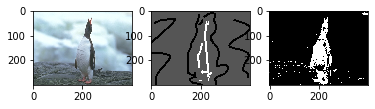

In [9]:
print(label.shape)
label = np.reshape(label,(nrows,ncols))
print(label.shape)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(image)
plt.subplot(1,3,2)
plt.imshow(bordes,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(label,cmap='gray')
plt.show()

In [ ]:
# Elegir 10 imagenes
# Para cada imagen, poner resultados de
#  Regresión Logística
#  Linear SVC
#  SVC
# Poner el tiempo de entrenamiento y predicción en cada caso

In [12]:
import datetime
x = datetime.datetime.now()
for i in range(999999):
    a = 10
y = datetime.datetime.now()
r = y-x
print(r.total_seconds())

0.124927
